## Cluster Analysis in Python Part 4
>Part 4 - Clustering in Real World
## Dominant colors in image
Dominant colors in image:
- All images consist of pixels
- Each pixel has three values: Red, Green and Blue
- Pixel color: combination of these RGB values
- Perform k-means on standardized RGB values to find cluster centers
- Uses: Identifying features in satelite images

In [6]:
import matplotlib.image as img
image = img.imread('datasets/sea.jpg')
print(image.shape)

(400, 700, 3)


### Convert image to RGB matrix

In [14]:
r = []
g = []
b = []

for row in image:
    for pixel in row:
    # A pixel contains RGB values
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

### DataFrame with RGB values

In [18]:
import pandas as pd
from scipy.cluster.vq import whiten

pixels = pd.DataFrame({'red': r,
                       'blue': b,
                       'green': g})
pixels.head()
pixels['scaled_red'] = whiten(pixels['red'])
pixels['scaled_green'] = whiten(pixels['green'])
pixels['scaled_blue'] = whiten(pixels['blue'])

### Create an elbow plot

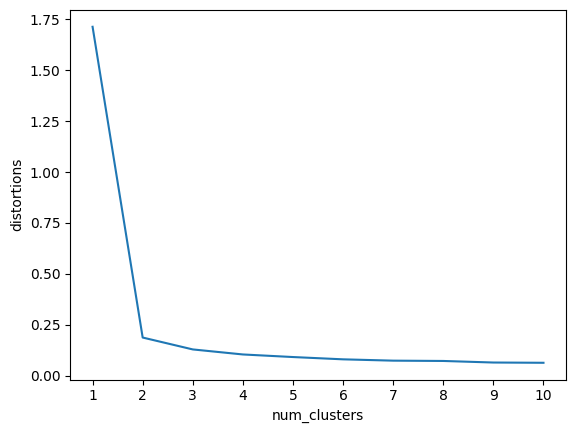

In [23]:
from scipy.cluster.vq import kmeans, vq
import seaborn as sns
import matplotlib.pyplot as plt 

distortions = []
num_clusters = range(1, 11)

# Create a list of distortions from the kmeans method
for i in num_clusters:
    cluster_centers, distortion = kmeans(pixels[['scaled_red','scaled_blue','scaled_green']], i)
    distortions.append(distortion)
    
# Create a DataFrame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters,'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

### Find dominant colors

In [24]:
cluster_centers, _= kmeans(pixels[['scaled_red','scaled_blue','scaled_green']], 2)

In [25]:
colors = []

# Find Standard Deviations
r_std, g_std, b_std = pixels[['red','blue','green']].std()

# Scale actual RGB values in range of 0-1
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors.append((
        scaled_r * r_std/255,
        scaled_g * g_std/255,
        scaled_b * b_std/255
    ))

**Display dominant colors**

In [26]:
print(colors)

[(0.1365369791272598, 0.3427025494198588, 0.29154968127217096), (0.8971812843956392, 0.9027847317509426, 0.9018273555973528)]


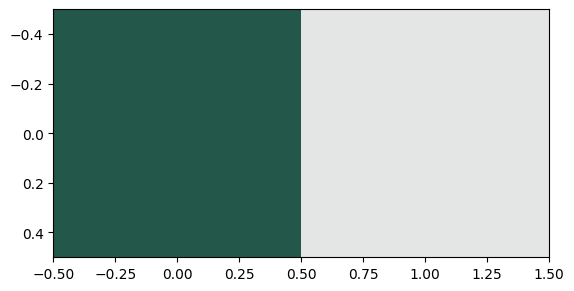

In [27]:
plt.imshow([colors])
plt.show()

## Document Clustering
Document clustering: concepts
1. Clean data before processing
2. Determine the importance of the terms in a document (in TF-IDF matrix)
3. Cluster the TF-IDF matrix
4. FInd top terms, document each cluster

In [17]:
from nltk.tokenize import word_tokenize
import re
def remove_noise(text, stop_words = []):
    tokens = word_tokenize(text)
    cleaned_tokens = []
    for token in tokens:
        token = re.sub('[^A-Za-z0-9]+','', token)
        if len(token) > 4 and token.lower() not in stop_words:
            # Get lowercase
            cleaned_tokens.append(token.lower())
    return cleaned_tokens
remove_noise("It is lovely weather we are having. I hope the weather continues.")

['lovely', 'weather', 'having', 'weather', 'continues']

#### TF-IDF (Term Frequency - Inverse Document 
Frequency
* A weighted measure: evaluate how important a word is to a document in a collection)

#### Clustering with sparse matrix
* `kmeans()` in SciPy does not support sparse matrices
* Use `.todense()` to convert to a matrix

#### Top terms per cluster
- Cluster centers: lists with a size equal to the number of terms
- Each value in the cluster center is its importance
- Create a dictionary and print top terms

### Exercise - TL-IDF of movie plots
Let us use the plots of randomly selected movies to perform document clustering on. Before performing clustering on documents, they need to be cleaned of any unwanted noise (such as special characters and stop words) and converted into a sparse matrix through TF-IDF of the documents.

Use the TfidfVectorizer class to perform the TF-IDF of movie plots stored in the list plots. The remove_noise() function is available to use as a tokenizer in the TfidfVectorizer class. The .fit_transform() method fits the data into the TfidfVectorizer objects and then generates the TF-IDF sparse matrix.

In [18]:
import pandas as pd

movies_df = pd.read_csv('datasets/movies_plot.csv')
movies_df.head()

,Title,Plot
0,The Ballad of Cable Hogue,"Cable Hogue is isolated in the desert, awaitin..."
1,Monsters vs. Aliens,"In the far reaches of space, a planet explodes..."
2,The Bandit Queen,Zarra Montalvo is the daughter of an American ...
3,Broken Arrow,Major Vic Deakins (John Travolta) and Captain ...
4,Dolemite,Dolemite is a pimp and nightclub owner who is ...


In [19]:
def apply_to_list(some_list):
    return[x for x in some_list]
plots = apply_to_list(movies_df['Plot'])

In [20]:
# Import TfidfVectorizer class from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df= 0.75, min_df=0.1, max_features=50, tokenizer=remove_noise)

# Use the .fit_transform() method on the list plots
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)

C:\Users\Farrel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [22]:
from scipy.cluster.vq import kmeans, vq
num_clusters = 2

# Generate cluster centers through the kmeans function
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names_out()

for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, cluster_centers[i]))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])

['their', 'after', 'while']
['father', 'family', 'young']


## Clustering with multiple features

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.vq import kmeans, vq
from scipy.cluster.vq import whiten
import random

In [95]:
fifa = pd.read_csv('datasets/fifa_18_sample_data.csv')

fifa['scaled_heading_accuracy'] = whiten(fifa['heading_accuracy'])
fifa['scaled_volleys'] = whiten(fifa['volleys'])
fifa['scaled_finishing'] = whiten(fifa['finishing'])

scaled_features = ['scaled_heading_accuracy', 'scaled_volleys', 'scaled_finishing']

In [96]:
random.seed(12)
# Create centroids with kmeans for 2 clusters
cluster_centers, _ = kmeans(fifa[scaled_features], 3, check_finite=True)

# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)
print(fifa.groupby('cluster_labels')[scaled_features].mean())

                scaled_heading_accuracy  scaled_volleys  scaled_finishing
cluster_labels                                                           
0                              3.620633        1.925540          1.852572
1                              3.015248        3.256514          3.190608
2                              0.682484        0.638146          0.581126


#### Visualizations

<Figure size 200x200 with 0 Axes>

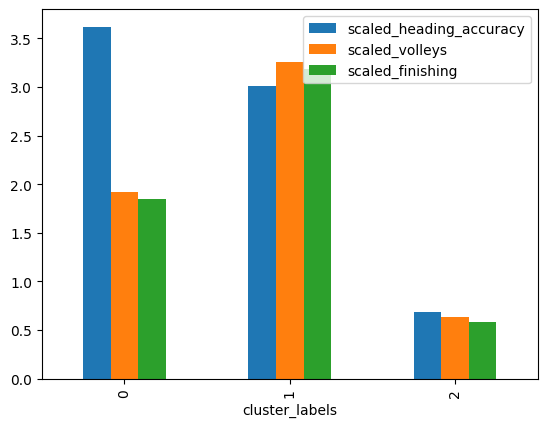

In [97]:
# Plot cluster centers
plt.figure(figsize=(2,2))
fifa.groupby('cluster_labels')[scaled_features].mean().plot(kind='bar')
plt.show()

In [98]:
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:1])

1 ['Cristiano Ronaldo']
2 ['M. Neuer']
0 ['G. Chiellini']


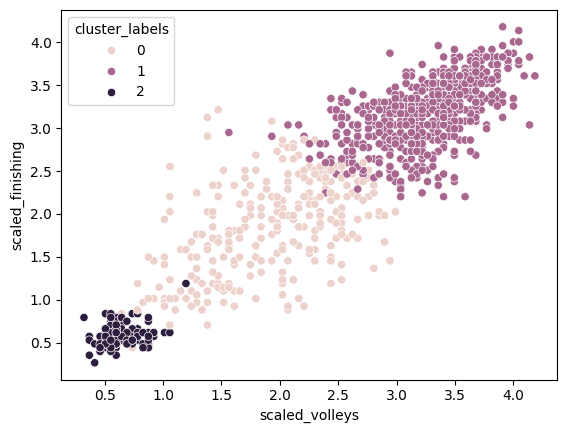

In [99]:
sns.scatterplot(x='scaled_volleys', y='scaled_finishing', data=fifa, hue='cluster_labels')
plt.show()